# The Hamiltonian Path Problem

## Problem

(*in English*)

**Imagine a chessboard of size 8×3.**

Place a knight on any one of the squares.

Is there a starting square such that the knight can visit every square exactly once — without repeating any?

(*dalam Bahasa Indonesia*)

**Bayangkan papan catur 8x3.**

Taruh bidak kuda di salah satu kotak di papan catur tersebut.

Apakah ada kotak sedemikian sehingga bidak kuda bisa mengunjungi semua kotak di papan itu tepat hanya sekali?

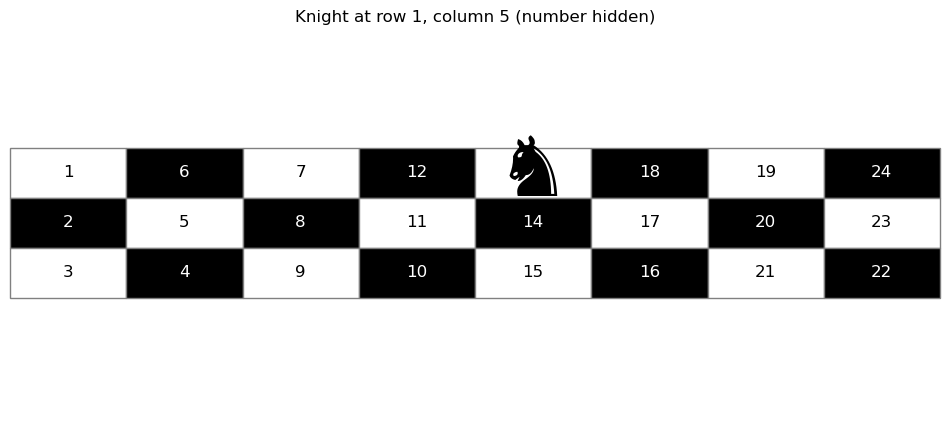

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Generate the 3×8 numbered board
board = np.zeros((3, 8), dtype=int)
num = 1
for col in range(8):
    board[0, col] = num
    board[1, col] = num + 1
    board[2, col] = num + 2
    num += 3

# Flip every second column vertically
for col in range(1, 8, 2):
    board[:, col] = board[::-1, col]

# Pick one random square for the knight
r, c = random.randint(0, 2), random.randint(0, 7)

# Define chessboard colors
colors = [['white' if (i + j) % 2 == 0 else 'black' for j in range(8)] for i in range(3)]

# Build cell text: only number, except knight cell shows just the knight icon
cell_text = [
    ["♞" if (i, j) == (r, c) else str(board[i, j]) 
     for j in range(8)]
    for i in range(3)
]

# Plot with larger figure to accommodate bigger icon
fig, ax = plt.subplots(figsize=(12, 5))
tb = ax.table(cellText=cell_text,
              cellLoc='center',
              loc='center',
              cellColours=colors)

# Disable auto font sizing and scale cells
tb.auto_set_font_size(False)
tb.scale(1, 3)  # increase cell height for larger icon

# Style borders and text colors; enlarge knight icon
for i in range(3):
    for j in range(8):
        cell = tb[(i, j)]
        text = cell.get_text()
        cell.set_edgecolor('gray')
        if (i + j) % 2 == 1:
            text.set_color('white')
        # Increase only the knight icon
        if (i, j) == (r, c):
            text.set_fontsize(60)
        else:
            text.set_fontsize(12)

ax.axis('off')
plt.title(f"Knight at row {r+1}, column {c+1} (number hidden)")
plt.show()


--- Solusi ---

Karena saya adalah seorang network scientist wannabe, first time reading this, saya sudah meyakini bahwa kita bisa merekonstruksi sebuah heuristik (sebuah strategi penyelesaian masalah yang sifatnya lebih 'praktis') untuk lebih cepat mengerjakan persoalan NP-complete ini (Hamiltonian path - first time knowing the name too for me - adalah sebuah problem yang masuk pada kategori NP-complete)

The reason of the higher complexity is:

Karena solusi yang perlu diperiksa buat 3x8 (berarti ada 24 kotak yang bisa dikunjungin oleh bidak kuda), at worst case, adalah n! = 24! (which is huge)

Walau, hal pertama yang bisa kita sadari, karena ada aturan catur yang perlu diikuti (gerakan L dari kuda), kita akan bekerja dengan subspace lebih kecil (salah satu strategi penting untuk filter out jalur yang perlu diperiksa)

Now, the plan to execute the solution will be:

1. Karena problemnya adalah existence, sebenarnya cukup hanya menunjukkan satu path yang valid

2. Untuk itu, dalam pencarian jalur yang sedmikian, saya meyakini bahwa persoalan ini akan lebih muda jika kita menomori kotak catur sedemikian (lihat penggambaran kotak catur di bawah). Ide paling naif utnuk bisa mendapatkan jawaban buat gua adalah jika kita memulai kuda dari salah satu ujung menuju ujung lainnya. Untuk bisa melakukan ini, kuda tentu perlu bergerak secara osilasi (*oscillating strategy*).

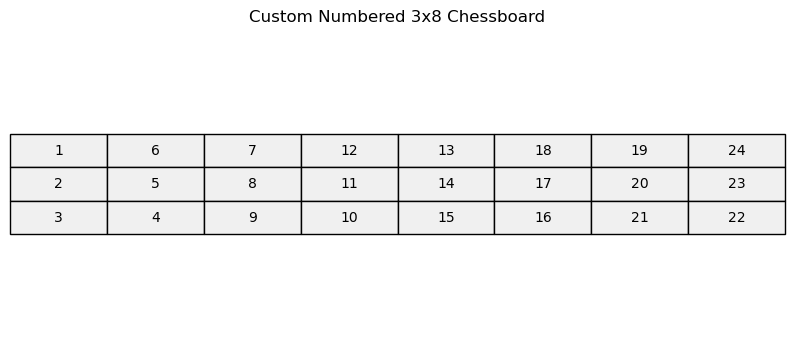

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

board = np.zeros((3, 8), dtype=int)
num = 1
for col in range(8):
    board[0, col] = num       # top row
    board[1, col] = num + 1   # middle row
    board[2, col] = num + 2   # bottom row
    num += 3

# Flip every second column vertically to match the pattern
for col in range(1, 8, 2):
    board[:, col] = board[::-1, col]

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))
tb = plt.table(cellText=board.astype(str), cellLoc='center', loc='center', cellColours=[["#f0f0f0"]*8]*3)
tb.scale(1, 2)
ax.axis('off')
plt.title("Custom Numbered 3x8 Chessboard")
plt.show()



3. Apa yang dimaksud dengan *oscillating strategy* di sini? 


    Jika kita berangkat dari nomor *n*, secara naif, saya melihat idea untuk mendapatkan jalur yang masuk akal dalam persoalan ini adalah untuk bergerak ke kanan-kiri di papan-nya (naik ke nomor k > n lalu ke l < n untuk n <= 12, dan sebaliknya jika n > 12) agar dapat memenuhi seluruh papan. 

    Alasan pikiran ini sederhana: jika pergerakknya akan terfokus pada area tertentu - misalnya terus bergerak hanya ke kiri papan, maka akan sangat tinggi kemungkinan kita tidak akan bisa keluar dari daerah tersebut karena kuda akan terperangkap (kuda sudah kehilangan tempat yang dibolehkan untuk diokupasi ketika kuda ingin bergerak ke kanan kembali).

    Lebih lengkapnya dapat dilihat pada kode di bawah nanti

4. Sekarang, untuk memiliki struktur data graph/network/jaringan (agar algoritma di atas dapat dieksekusi dengan baik - menggunakan DFS), kita bisa dengan mudah menyusun koneksi antar kotak dengan pola seperti demikian:

    1 -> 4, 8 (+3, +7) (bi-directional: jika 1 -> 4 exist, maka 4 -> 1 exist)

    2 -> 7, 9 (+5, +7)

    3 -> 6, 8 (+3, +5)

    4 -> 7, 11 (+3, +7) (untuk 4 -> 1 sudah kita catat lebih dulu ketika mengetahui 1 -> 4 exist)

    Dari sini, kita bisa melihat bahwa ada pengulangan pola untuk tiap pengulangan angkai sampai dengan kelipatan 3 (nomor 1 akan sama dengan 4, 2 akan sama dengan 5, 3 akan sama dengan 6, dan seterusnya).
    
    Untuk merepresentasikan hal tersebut, kita bisa menggunakan operasi mod 3, lebih spesifiknya: 
    
    x mod 3 = 1 akan menggunakan rule +3, +7; 
    x mod 3 = 2 akan menggunakan rule +5, +7;
    x mod 3 = 0 akan menggunakan rule +3, +5 
    (dan semuanya exist dalam bentuk bi-directional edges - jika ada )

    Graph sendiri terdiri dari node (lingkarang yang terlihat di graph di bawah) dan edges (garis yang menghubungakan node). Dalam representasi catur ini, node adalah kotak yang bisa dikunjungi dan edges adalah gerakan dari satu ke kotak lainnya yang dibolehkan dalam aturan catur

    Code-nya bisa dilihat juga di bawah.

In [7]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Total nodes
n_nodes = 24

# Define move patterns based on position modulo 3
move_patterns = {
    1: [3, 7],
    2: [5, 7],
    0: [3, 5],
}

# Construct graph
for i in range(1, n_nodes + 1):
    mods = move_patterns[i % 3 if i % 3 != 0 else 0]
    for move in mods:
        target = i + move
        if target <= n_nodes:
            G.add_edge(i, target)
            G.add_edge(target, i)  # reversibility


In [8]:
G.edges

OutEdgeView([(1, 4), (1, 8), (4, 1), (4, 7), (4, 11), (8, 1), (8, 3), (8, 13), (8, 15), (2, 7), (2, 9), (7, 2), (7, 4), (7, 10), (7, 14), (9, 2), (9, 6), (9, 12), (9, 14), (3, 6), (3, 8), (6, 3), (6, 9), (6, 11), (11, 4), (11, 6), (11, 16), (11, 18), (5, 10), (5, 12), (10, 5), (10, 7), (10, 13), (10, 17), (12, 5), (12, 9), (12, 15), (12, 17), (14, 7), (14, 9), (14, 19), (14, 21), (13, 8), (13, 10), (13, 16), (13, 20), (15, 8), (15, 12), (15, 18), (15, 20), (17, 10), (17, 12), (17, 22), (17, 24), (16, 11), (16, 13), (16, 19), (16, 23), (18, 11), (18, 15), (18, 21), (18, 23), (20, 13), (20, 15), (19, 14), (19, 16), (19, 22), (21, 14), (21, 18), (21, 24), (23, 16), (23, 18), (22, 17), (22, 19), (24, 17), (24, 21)])

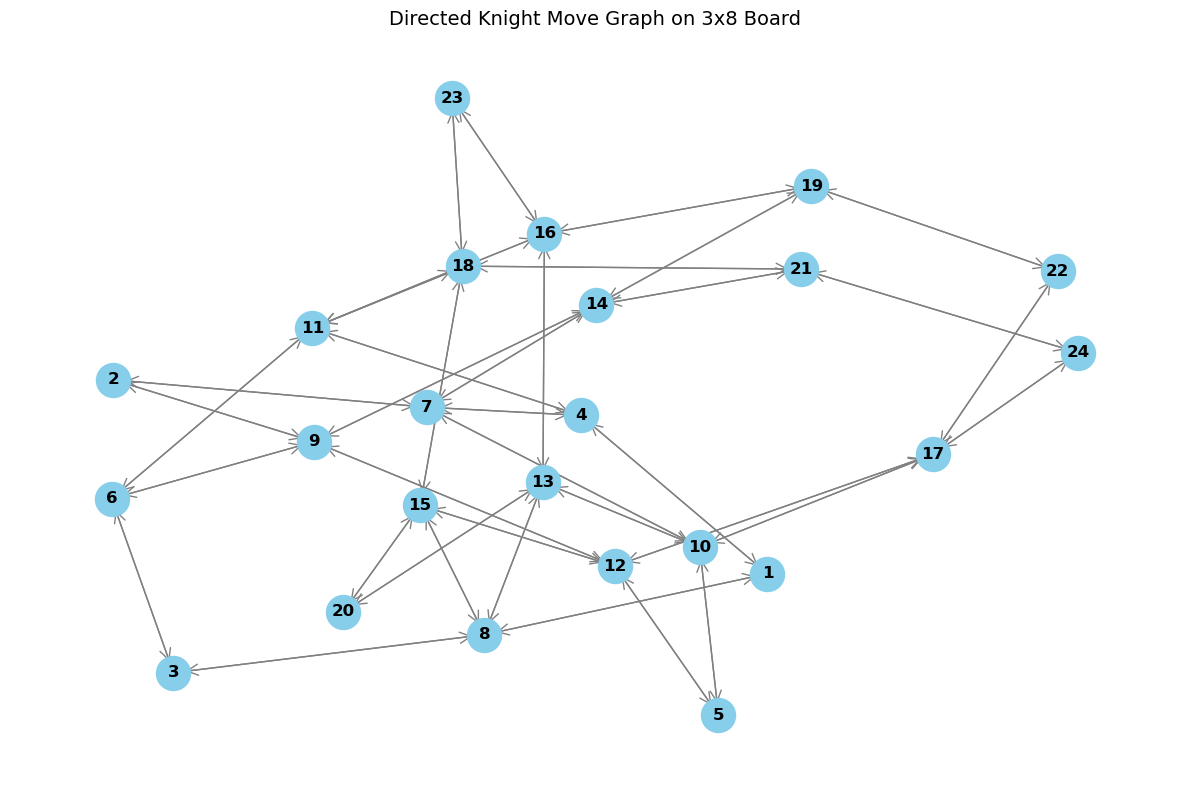

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Use spring layout for visualization
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=600)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("Directed Knight Move Graph on 3x8 Board", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [10]:
## OLD CODE

# def oscillating_hamiltonian_path(G, start):
#     visited = []
#     n = G.number_of_nodes()

#     mode = 'up' if start <= 12 else 'down'

#     def dfs(current, visited, mode):
#         visited.append(current)
#         if len(visited) == n:
#             return True

#         neighbors = list(G.successors(current))
#         unvisited = [v for v in neighbors if v not in visited]

#         # Try expected direction first
#         if mode == 'up':
#             primary = sorted([v for v in unvisited if v > current])
#             fallback = sorted([v for v in unvisited if v < current], reverse=True)
#             next_mode = 'down'
#         else:  # mode == 'down'
#             primary = sorted([v for v in unvisited if v < current], reverse=True)
#             fallback = sorted([v for v in unvisited if v > current])
#             next_mode = 'up'

#         for v in primary:
#             if dfs(v, visited, next_mode):
#                 return True

#         # Try fallback direction (temporary break in oscillation)
#         for v in fallback:
#             if dfs(v, visited, mode):  # still same mode if fallback
#                 return True

#         visited.pop()
#         return False

#     success = dfs(start, visited, mode)
#     return success, visited if success else None

# # Try from all 6 corners
# corner_starts = [1, 2, 3, 22, 23, 24]
# unique_paths = set()

# for start in corner_starts:
#     found, path = oscillating_hamiltonian_path(G, start)
#     if found:
#         path_tuple = tuple(path)
#         if path_tuple not in unique_paths:
#             unique_paths.add(path_tuple)
#             print(f"New Hamiltonian Path from {start}:")
#             print(path)

# if not unique_paths:
#     print("No paths found.")



5. Setelah struktur graph terbentuk (yang mana kita telah memberikan restriksi untuk legal moves/gerakan kuda yang dibolehkan), proses berikutnya adalah mengesekusi proses pencarian jalur dengan "oscillating strategy" yang saya sempat jelaskan di awal. Saya menggunakan strategi yang cukup umum di kalangan peneliti graph/network: DFS (Depth-First Search)
    
    Sedikit info tentang DFS: ini adalah metode pencarian jalur yang terus menjelajah sampai menemui jalan buntu atau kondisi yang tidak memenuhi syarat. Saat menemui jalan buntu, algoritma akan backtrack, kembali ke level sebelumnya — jika dilihat di ilustrasi di bawah, setelah menjalani A-B-D, buntu, dan kembali lagi ke A-B, lalu melanjutkan ke A-B-C — untuk mencari jalur alternatif, dan proses ini berlanjut hingga ditemukan jalur yang sesuai.

    Dalam konteks papan catur yang kita kerjakan, tentu saja setiap kotak (dan ini direpresentasikan dengan node - titik ) hanya boleh dikunjungi satu kali. Jadi, ketika tidak ada opsi lanjutan, kita akan backtrack ke kotak sebelumnya untuk mengeksplorasi kemungkinan lain - tentu backtrack akan kita lakukan juga untuk mencari seluruh jalur (path) bidak kuda yang dimungkinkan dengan strategi ini.

    Untuk mendukung strategi oscillating, kita menggunakan dua jenis jalur: primary path dan fallback path. Primary path adalah jalur utama yang mengikuti pola osilasi yang kita inginkan—misalnya dari angka kecil → besar → kecil → dan seterusnya. Namun, pola ini tentu akan menemui kebuntuan (misalnya down (kecil) → up (besar) → harusnya down (kecil) namun mentok/tidak ada akses node yang memungkinkan), padahal sebenarnya bisa saja dilanjutkan ke angka besar ( down -> up -> up -> down -> ...). Jalur ketika mengalami kebuntuan ini yang kita sebut sebagai fallback path, yang secara sementara keluar dari aturan osilasi, lalu kembali lagi ke strategi osilasi setelah memungkinkan.



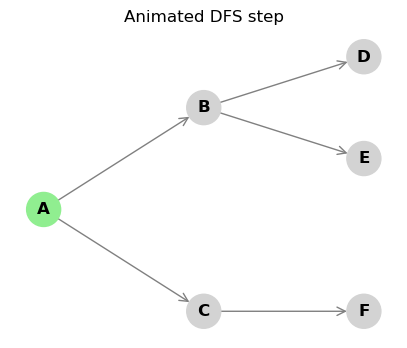

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation
from IPython.display import HTML

# Create a simple directed graph with 6 nodes
G = nx.DiGraph()
edges = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F')
]
G.add_edges_from(edges)

# Fixed positions for clarity
pos = {
    'A': (0, 0),
    'B': (1, 1),
    'C': (1, -1),
    'D': (2, 1.5),
    'E': (2, 0.5),
    'F': (2, -1)
}

# Define branch colors for each subtree
branch_colors = {'B': 'red', 'C': 'blue', 'D': 'red', 'E': 'red', 'F': 'blue'}
default_color = 'lightgreen'

# Prepare events for animation
events = []  # List of (action, target, color)

def dfs(node, visited):
    # Enter node
    color = branch_colors.get(node, default_color)
    events.append(('enter_node', node, color))
    visited.add(node)
    for nbr in G.successors(node):
        if nbr not in visited:
            edge_color = branch_colors.get(nbr, default_color)
            # Traverse edge
            events.append(('enter_edge', (node, nbr), edge_color))
            dfs(nbr, visited)
            # Backtrack edge
            events.append(('exit_edge', (node, nbr), None))
    # Exit node (backtracking)
    events.append(('exit_node', node, None))

# Run DFS from 'A'
dfs('A', set())

# Initialize colors
node_colors = {n: 'lightgray' for n in G.nodes()}
edge_colors = {e: 'gray' for e in G.edges()}

# Create animation
fig, ax = plt.subplots(figsize=(5, 4))

def update(frame):
    action, target, color = events[frame]
    if action == 'enter_node':
        node_colors[target] = color
    elif action == 'exit_node':
        node_colors[target] = 'lightgray'
    elif action == 'enter_edge':
        edge_colors[target] = color
    elif action == 'exit_edge':
        edge_colors[target] = 'gray'
    
    ax.clear()
    nx.draw(
        G, pos, ax=ax, with_labels=True,
        node_color=[node_colors[n] for n in G.nodes()],
        edge_color=[edge_colors[e] for e in G.edges()],
        arrows=True, arrowstyle='->', arrowsize=15,
        node_size=600, font_weight='bold'
    )
    
    # Show only the node related in the title
    if action.endswith('node'):
        title_target = target
    else:
        # For edges, show the child node
        title_target = target[1]
    ax.set_title("Animated DFS step")

ani = animation.FuncAnimation(fig, update, frames=len(events), interval=800, repeat=False)

# Display inline and save as GIF
#HTML(ani.to_jshtml())
ani.save('dfs_aniimated.gif', writer='pillow', fps=1)


In [3]:
corner_starts = [i for i in range(1,25)]

In [ ]:
def all_oscillating_hamiltonian_paths(G, start):
    n = G.number_of_nodes()
    results = []

    mode = 'up' if start <= 12 else 'down'

    def dfs(current, visited, mode):
        if len(visited) == n:
            results.append(list(visited))
            # print("Results if finished")
            return  # Don’t stop — collect all

        neighbors = list(G.successors(current))
        unvisited = [v for v in neighbors if v not in visited]

        if mode == 'up':
            primary = sorted([v for v in unvisited if v > current])
            fallback = sorted([v for v in unvisited if v < current], reverse=True)
            next_mode = 'down'
        else:
            primary = sorted([v for v in unvisited if v < current], reverse=True)
            fallback = sorted([v for v in unvisited if v > current])
            next_mode = 'up'

        for v in primary:
            visited.append(v)
            dfs(v, visited, next_mode)
            visited.pop()

        for v in fallback:
            visited.append(v)
            dfs(v, visited, mode)  # fallback doesn't switch mode
            visited.pop()

    dfs(start, [start], mode)
    return results

all_paths = []
for start in corner_starts:
    paths = all_oscillating_hamiltonian_paths(G, start)
    all_paths.extend(paths)
    for p in paths:
        print(f"Path from {start}:", p)

print(f"Total unique oscillating Hamiltonian paths: {len(all_paths)}")


Path from 1: [1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 16, 23, 18, 21, 14, 19, 22, 17, 24]
Path from 1: [1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 16, 23, 18, 21, 24, 17, 22, 19, 14]
Path from 1: [1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 18, 23, 16, 19, 14, 21, 24, 17, 22]
Path from 1: [1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 18, 23, 16, 19, 22, 17, 24, 21, 14]
Path from 1: [1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 13, 10, 5, 12, 15, 20]
Path from 1: [1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 13, 20, 15, 12, 5, 10]
Path from 1: [1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 15, 12, 5, 10, 13, 20]
Path from 1: [1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 15, 20, 13, 10, 5, 12]
Path from 1: [1, 4, 7, 2, 9, 14, 19, 22, 17, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 16, 23, 18, 21, 24]
Path from 1: [1, 4, 7, 2, 9, 14, 19, 22, 17, 10, 5, 12, 15, 20, 13, 8, 3, 6, 11, 16, 23, 18

6. Menggunakan strategi ini, kita berhasil menjawab:

    Terdapat solusi untuk bidak kuda dapat mengunjungi seluruh kotak dalam papan catur 3x8 tepat sekali

    dan....

    setidaknya, dengan strategi yang saya susun, terdapat 792 cara yang valid sebagai solusi dari jalur (path) bidak kuda dengan hanya berada di satu kotak dalam papan catur 3x8 tepat sekali.

    Saya juga menemukan bahwa dengan cara ini, kita tidak akan pernah bisa mendapatkan solusi jika memulai dari nomor 8 dan 17 pada papan catur yang saya nomorin tadi.

    I like and satisfy with my way to solve this! Hope you guys learn something too!

In [58]:
import random

unique_paths = random.sample(all_paths, 6)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


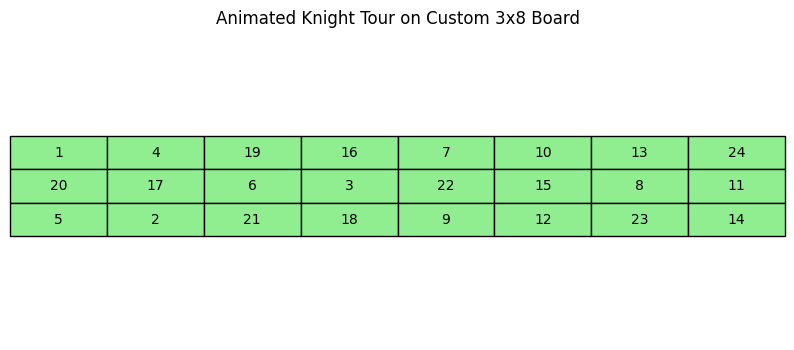

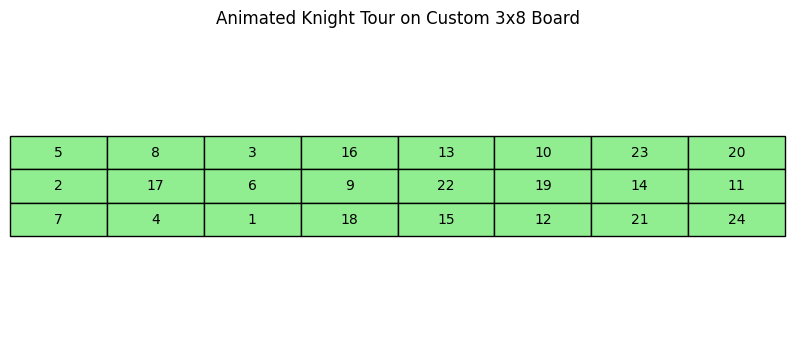

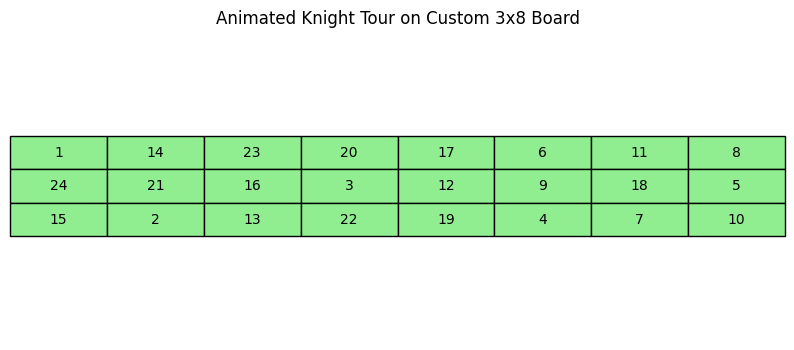

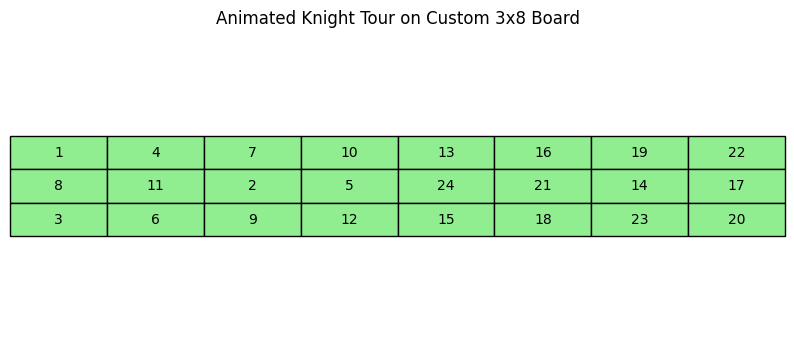

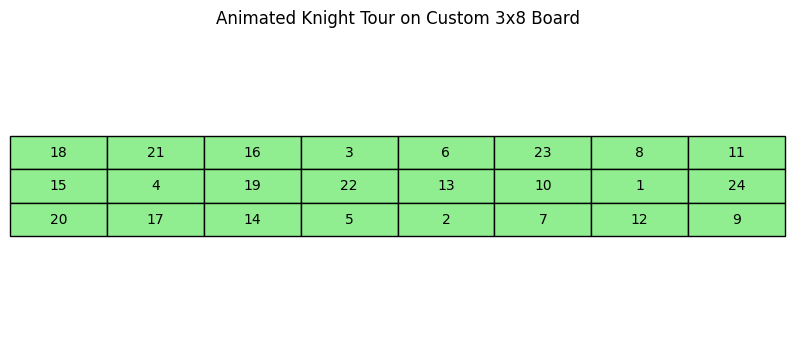

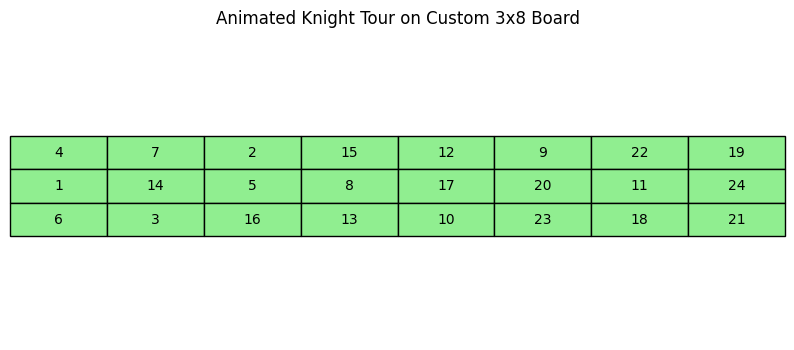

In [59]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

i = 0

for path in unique_paths:
    i+=1
    # Step-by-step path
    path = list(path)
    
    # Build the base board with your custom numbering
    board = np.zeros((3, 8), dtype=int)
    num = 1
    for col in range(8):
        board[0, col] = num
        board[1, col] = num + 1
        board[2, col] = num + 2
        num += 3
    
    for col in range(1, 8, 2):
        board[:, col] = board[::-1, col]
    
    # Map: node -> (row, col)
    position_map = {}
    for row in range(3):
        for col in range(8):
            position_map[board[row, col]] = (row, col)
    
    # Create animation
    fig, ax = plt.subplots(figsize=(10, 4))
    tb = plt.table(cellText=[[""]*8 for _ in range(3)], cellLoc='center', loc='center', cellColours=[["#f0f0f0"]*8]*3)
    tb.scale(1, 2)
    ax.axis('off')
    plt.title("Animated Knight Tour on Custom 3x8 Board")
    
    def update(frame):
        step_node = path[frame]
        row, col = position_map[step_node]
        tb[(row, col)].get_text().set_text(str(frame + 1))
        tb[(row, col)].set_facecolor("#90ee90")  # light green for visited
        return tb,
    
    ani = animation.FuncAnimation(fig, update, frames=len(path), interval=500, blit=False, repeat=False)
    
    # To display in Jupyter Notebook:
    #plt.show()
    
    # To save as video:
    ani.save(f"knight_tour_path{i}.gif", writer="ffmpeg")


Additional notes:

Saya juga mencoba mekanisme yang less restricted dengan melakukan oscillating hanya ketika kita sudah berjalan 2 atau 3 kali up -> up -> up atau down -> down -> down (walau sebenarnya kasus ini terlihat jelas sudah tertangkap oleh 792 path yang kita dapatkan sebelumnya - karena kita melakukan DFS pada seluruh possible path)

Namun, just for the sake of completeness for my own knowledge, saya coba code juga dan terlihat bahwa benar kita akan tetap mendapatkan 792 unique path yang telah kita dapatkan sebelumnya.

In [ ]:
def all_hamiltonian_paths(G, start, first_steps=0):
    n = G.number_of_nodes()
    results = []
    initial_mode       = 'up'   if start <= 12 else 'down'
    initial_steps_left = first_steps

    def dfs(current, visited, mode, steps_left):
        # completed a Hamiltonian path
        if len(visited) == n:
            results.append(tuple(visited))
            return

        # all unvisited successors
        unvisited = [v for v in G.successors(current) if v not in visited]

        # 1) first-N same-direction phase
        if steps_left > 0:
            # pick only same-direction moves
            if mode == 'up':
                same = sorted(v for v in unvisited if v > current)
            else:
                same = sorted((v for v in unvisited if v < current), reverse=True)

            if same:
                for v in same:
                    visited.append(v)
                    dfs(v, visited, mode, steps_left-1)
                    visited.pop()
            else:
                # fallback: if no same-direction available, allow any
                for v in sorted(unvisited):
                    visited.append(v)
                    dfs(v, visited, mode, steps_left-1)
                    visited.pop()

        # 2) oscillating phase
        else:
            if mode == 'up':
                primary   = sorted(v for v in unvisited if v > current)
                fallback  = sorted((v for v in unvisited if v < current), reverse=True)
                next_mode = 'down'
            else:
                primary   = sorted((v for v in unvisited if v < current), reverse=True)
                fallback  = sorted(v for v in unvisited if v > current)
                next_mode = 'up'

            # primary edges flip mode
            for v in primary:
                visited.append(v)
                dfs(v, visited, next_mode, 0)
                visited.pop()
            # fallback edges keep mode
            for v in fallback:
                visited.append(v)
                dfs(v, visited, mode, 0)
                visited.pop()

    dfs(start, [start], initial_mode, initial_steps_left)
    return results


# Collect all three strategies:
all_paths = set()
for start in corner_starts:
    for k in (0, 2, 3):  # 0=oscillate, 2=double-first, 3=triple-first
        for p in all_hamiltonian_paths(G, start, first_steps=k):
            tag = {0: "Oscillate", 2: "Double-first", 3: "Triple-first"}[k]
            print(f"{tag} from {start} → {p}")
            all_paths.add(p)

print(f"Total unique paths across all strategies: {len(all_paths)}")


Oscillate from 1 → (1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 16, 23, 18, 21, 14, 19, 22, 17, 24)
Oscillate from 1 → (1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 16, 23, 18, 21, 24, 17, 22, 19, 14)
Oscillate from 1 → (1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 18, 23, 16, 19, 14, 21, 24, 17, 22)
Oscillate from 1 → (1, 4, 7, 2, 9, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 18, 23, 16, 19, 22, 17, 24, 21, 14)
Oscillate from 1 → (1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 13, 10, 5, 12, 15, 20)
Oscillate from 1 → (1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 13, 20, 15, 12, 5, 10)
Oscillate from 1 → (1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 15, 12, 5, 10, 13, 20)
Oscillate from 1 → (1, 4, 7, 2, 9, 14, 19, 22, 17, 24, 21, 18, 23, 16, 11, 6, 3, 8, 15, 20, 13, 10, 5, 12)
Oscillate from 1 → (1, 4, 7, 2, 9, 14, 19, 22, 17, 12, 5, 10, 13, 20, 15, 8, 3, 6, 11, 16, 23, 18, 21, 24)
Oscillate from 1 → (1, 4, 7, 2, 9, 14